Day 03 Activity 01

Linear regression, Multivariate linear regression and Logistic regression


1. Use the given ‘boston housing’ dataset and attribute information to answer the following
questions.\
Attribute Information:\
These attributes represent different characteristics of the town or neighborhood, such as crime rate,
zoning, air pollution, average number of rooms, age of houses, accessibility to highways, property
tax rate, pupil-teacher ratio, racial makeup, and socioeconomic status.\
●CRIM : per capita crime rate by town. Measures the per capita crime rate by town\
●ZN : proportion of residential land zoned for lots over 25,000 sq.ft.\
●INDUS : proportion of non-retail business acres per town\
●CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). This variable is a
dummy variable that takes a value of 1 if the tract bounds the Charles River, and 0 otherwise.\
The Charles River is a river that flows through Boston and some of its suburbs.\
●NOX : nitric oxides concentration (parts per 10 million)\
●RM : average number of rooms per dwelling\
●AGE : proportion of owner-occupied units built prior to 1940\
●DIS : weighted distances to five Boston employment centres\
●RAD : index of accessibility to radial highways\
●TAX : full-value property-tax rate per $10,000\
●PTRATIO : pupil-teacher ratio by town\
●B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
●LSTAT : Percentage of lower status of the population. This variable represents the percentage
of the population that has a lower socioeconomic status\
●MEDV : Median value of owner-occupied homes in $1000's. This variable represents the
median value of owner-occupied homes in $1000s

I. Load the dataset into a Pandas DataFrame and explore the data.

In [1]:
import pandas as pd

df = pd.read_csv('boston housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


II. Create a scatter plot to visualize the relationship between the 'MEDV' and 'LSTAT' columns.

Text(0, 0.5, 'LSTAT')

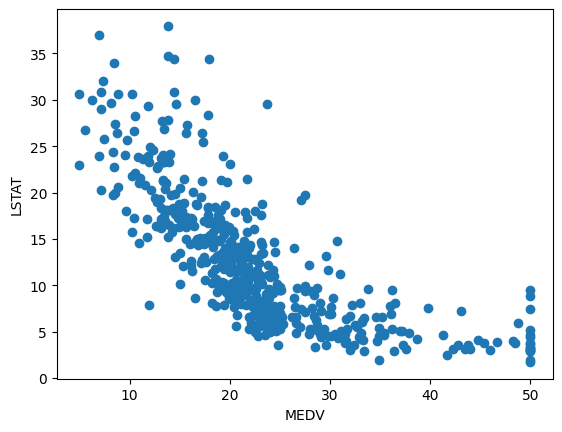

In [2]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['MEDV'],df['LSTAT'])
plt.xlabel('MEDV')
plt.ylabel('LSTAT')

III. Based on the scatter plot, what can you say about the relationship between the 'MEDV' and
'LSTAT' columns?

In [3]:
# It has a kind of linear relationship

IV. Calculate the correlation coefficient between the 'MEDV' and 'LSTAT' columns.


In [4]:
correlation_coefficient = df['MEDV'].corr(df['LSTAT'])
print("Correlation Coefficient between 'MEDV' and 'LSTAT':", 
      correlation_coefficient)
correlation_coefficient = df['MEDV'].corr(df['RM'])
print("Correlation Coefficient between 'MEDV' and 'RM':", 
      correlation_coefficient)
correlation_coefficient = df['MEDV'].corr(df['PTRATIO'])
print("Correlation Coefficient between 'MEDV' and 'PTRATIO':", 
      correlation_coefficient)

Correlation Coefficient between 'MEDV' and 'LSTAT': -0.7376627261740147
Correlation Coefficient between 'MEDV' and 'RM': 0.6953599470715396
Correlation Coefficient between 'MEDV' and 'PTRATIO': -0.5077866855375618


V. Fit a multivariate linear regression model to predict the 'MEDV' column using the 'RM', 'LSTAT',
and 'PTRATIO' columns. Print the coefficients and intercept of the regression line.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
# feature selection
x = df[['RM', 'LSTAT', 'PTRATIO']]
# Initialize the StandardScaler
scaler = StandardScaler()

y = np.array(df['MEDV'])
# reshape
y = y.reshape(-1, 1)
# train test split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2)
# Fit the StandardScaler to your data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

print('Coeffiecient : ',model.coef_)
print('Intercept : ', model.intercept_)

Coeffiecient :  [[ 3.22818444 -4.08154814 -1.95396562]]
Intercept :  [22.81633663]


VI. Calculate the R-squared value for the multivariate linear regression model from question 1

In [7]:
y_pred = model.predict(X_test)
error = mean_squared_error(y_test,y_pred)
r_sq = r2_score(y_test,y_pred)
print('MS_Error : ', error,' , R-Squared : ', r_sq)

MS_Error :  16.976507809995812  , R-Squared :  0.7590956298428864


VII. Create a scatter plot to visualize the relationship between the predicted values and the actual
'MEDV' values from the multivariate linear regression model

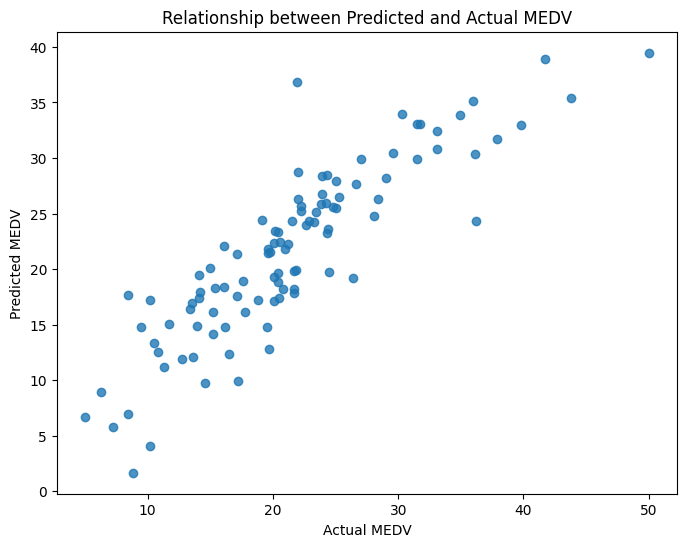

In [8]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Relationship between Predicted and Actual MEDV')
# plt.grid(True)
plt.show()

VIII. Use the multivariate linear regression model from question 5 to predict the median value of
owner-occupied homes in $1000s for a house with 6 rooms, 10% lower status population,
and a pupil-teacher ratio of 20

In [12]:
X = [[6,10,20]]
scaler.fit(X)
y_pred = model.predict(scaler.transform(X))
y_pred

array([[22.81633663]])

2. Use the given "Heart Disease" dataset (heart.csv) to answer the following questions

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [21]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I. Use appropriate visualisation and find the distribution of heart disease in the dataset, and
the correlation between different features

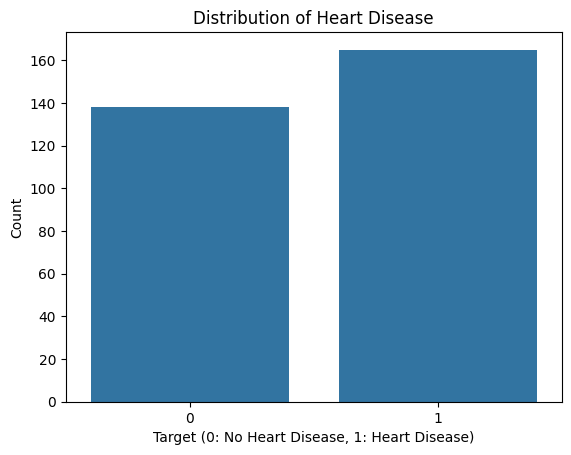

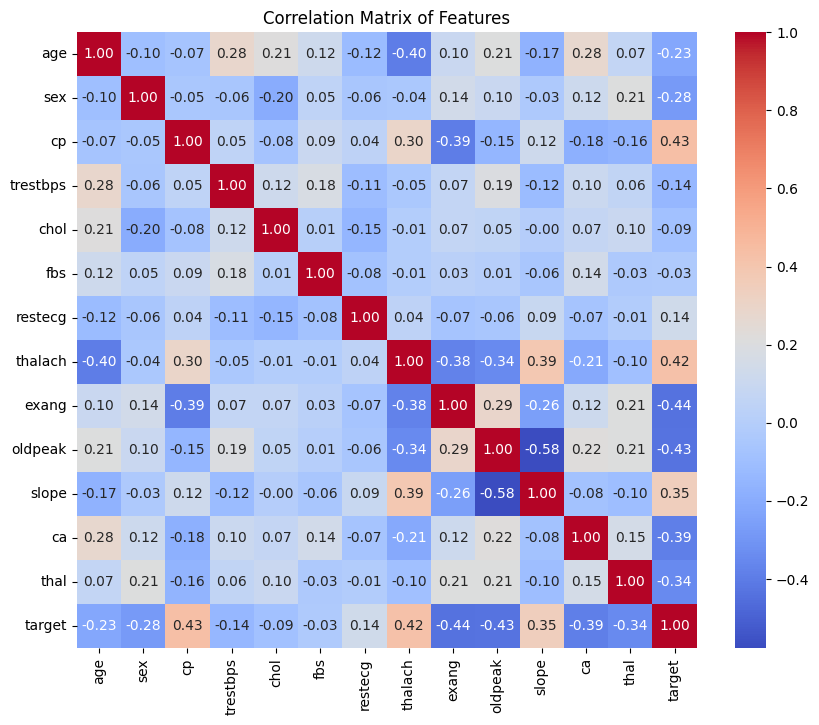

In [24]:
plt.figure()
sns.countplot(x='target', data=heart_data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Count')
plt.show()

correlation_matrix = heart_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

II. Using gradient descent to train a model, implement logistic regression on the heart disease
dataset.

In [25]:
x = heart_data.drop(columns='target')
y = np.array(heart_data['target'])
y = y.reshape(-1,1)

In [26]:
# train test split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2)
# Fit the StandardScaler to your data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\nilak\.conda\envs\dsp_ucsc\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
c_m = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ',c_m)
print('Accuracy on trainning : ',accuracy_score(y_train,y_pred_train))
print('Accuracy on testing : ',accuracy_score(y_test,y_pred_test))
# print('F1 Score : ',f1_score(y_test,y_pred))

Confusion Matrix :  [[23  3]
 [ 6 29]]
Accuracy on trainning :  0.8512396694214877
Accuracy on testing :  0.8524590163934426


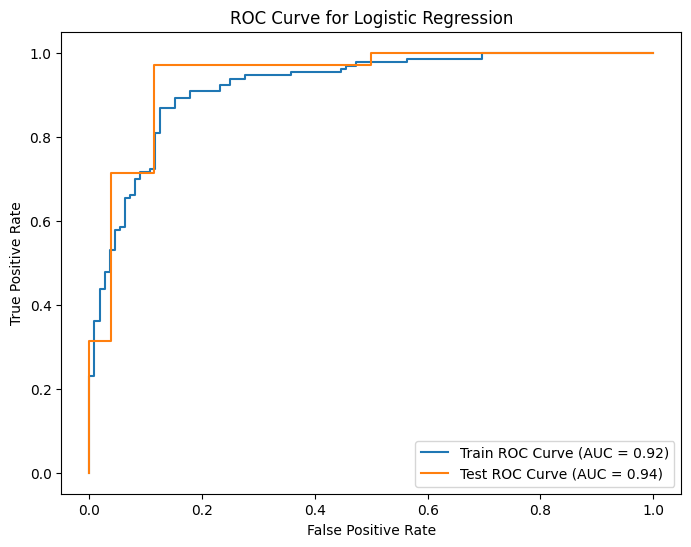

In [36]:
from sklearn.metrics import roc_curve, auc

y_train_probs = model.predict_proba(X_train)[:, 1]
y_test_probs = model.predict_proba(X_test)[:, 1]

train_fpr, train_tpr, _ = roc_curve(y_train, y_train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_probs)
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC Curve (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test ROC Curve (AUC = {test_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()